In [75]:
import os
import time
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [76]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")

In [77]:
train.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054


In [78]:
train.set_index("ID")

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level
ID,,,,,,,,,,,
7570,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3
12128,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4
2181,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3
5946,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3
9054,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2
...,...,...,...,...,...,...,...,...,...,...,...
11493,11,1,0.49,5,5.0,13.0,0.919971,329.66,1,1029600.0,4
305,10,0,0.52,2,14.0,28.0,0.433921,348.74,1,1047200.0,3
612,7,1,0.13,2,25.0,42.0,0.470631,366.76,1,941600.0,3


In [79]:
test.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),ID
0,8,0,0.52,2,19.0,52.0,0.376652,319.06,1,976800.0,1
1,9,0,0.44,2,6.0,12.0,0.254772,351.92,1,1082400.0,10
2,8,0,0.44,3,7.0,18.0,0.472100,349.80,1,924000.0,14
3,10,0,0.39,2,3.0,13.0,0.478708,343.44,1,1003200.0,17
4,9,0,0.44,2,6.0,14.0,0.561674,346.62,1,924000.0,21


In [80]:
test.set_index("ID")

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
ID,,,,,,,,,,
1,8,0,0.52,2,19.0,52.0,0.376652,319.06,1,976800.0
10,9,0,0.44,2,6.0,12.0,0.254772,351.92,1,1082400.0
14,8,0,0.44,3,7.0,18.0,0.472100,349.80,1,924000.0
17,10,0,0.39,2,3.0,13.0,0.478708,343.44,1,1003200.0
21,9,0,0.44,2,6.0,14.0,0.561674,346.62,1,924000.0
...,...,...,...,...,...,...,...,...,...,...
12484,8,1,0.27,3,5.0,77.0,0.552863,338.14,1,827200.0
12487,7,1,0.03,3,7.0,15.0,0.588106,363.58,1,827200.0
12488,10,1,0.25,3,33.0,151.0,0.626285,334.96,1,809600.0


def make_bool(df,column):
    df[column] = np.where(df[column]>1,1,df[column])
    return df
    

train = make_bool(train,"Diplomatic_Meetings_Set")
train = make_bool(train,"Aircraft_Carriers_Responding")
test = make_bool(test,"Diplomatic_Meetings_Set")
test = make_bool(test,"Aircraft_Carriers_Responding")


Entrenemos un modelo XGBoost, todo por defecto. Para utilizarlo como benchmark para futuras mejoras.

In [81]:
label = train["DEFCON_Level"]
train = train.drop(columns="DEFCON_Level")


In [82]:
label = label.apply(lambda x: x-1)

Recordar que las clases tienen que empezar en 0. Luego, deberemos revetir esto para subir la prediccion.


In [83]:
label.value_counts()

1    4270
2    3910
3    1212
0     498
4     110
Name: DEFCON_Level, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(train, label, random_state=42)

In [85]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)


In [86]:
params = {
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 5,
}

In [87]:
bst = xgb.train(params, dtrain)

In [88]:
dtest_pred = bst.predict(dtest) + 1

In [89]:
y_test = y_test+1

In [90]:
def get_clasification_report():
    named_tuple = time.localtime()
    time_string = time.strftime("%m-%d-%Y_%H:%M:%S", named_tuple)
    classification_report1 = classification_report(y_test, dtest_pred,output_dict=True)
    classification_report1 = pd.DataFrame(classification_report1)
    classification_report1.to_csv('reports/reporte-'+time_string+'.csv',index=False)
    return classification_report1

In [91]:
get_clasification_report()

,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.233333,0.682056,0.546737,0.562162,0.666667,0.6064,0.538191,0.593116
recall,0.056452,0.725672,0.652632,0.331210,0.060606,0.6064,0.365314,0.606400
f1-score,0.090909,0.703188,0.595010,0.416834,0.111111,0.6064,0.383410,0.587930
support,124.000000,1079.000000,950.000000,314.000000,33.000000,0.6064,2500.000000,2500.000000


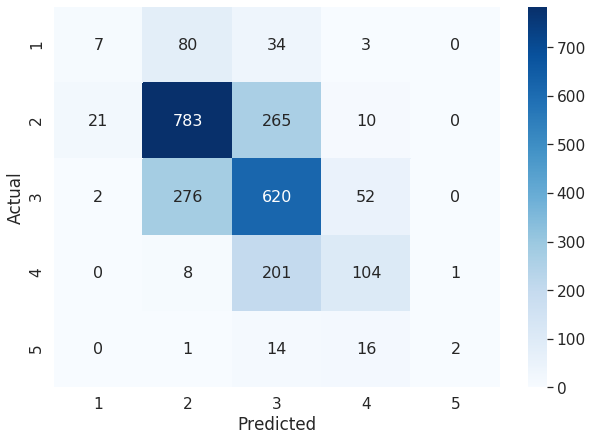

In [37]:
data = confusion_matrix(y_test, dtest_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='d')# font size


In [14]:
def make_pred(test):
    ids = test["ID"].values
    
    test = xgb.DMatrix(data=test)
    pred = bst.predict(test)

    pred = pd.DataFrame({'ID':ids,'DEFCON_Level':pred})
    pred["DEFCON_Level"] = pred["DEFCON_Level"].apply(lambda x: x+1)
    return pred

In [15]:
def save_prediction(pred):
    named_tuple = time.localtime() # get struct_time
    time_string = time.strftime("%m-%d-%Y_%H:%M:%S", named_tuple)
    
    try:
        os.mkdir('predictions')
    except:
        pass
    
    pred.to_csv('predictions/submit-'+time_string+'.csv',index=False)

In [16]:
# pred = make_pred(test)
# save_prediction(pred)